In [3]:
from fastai.vision.all import *
from fastbook import *
from fastai.vision.widgets import *

In [5]:

Fruits = ['apple','banana','orange','lemon']
path = Path('fruits')
     

if not path.exists():
    path.mkdir()
    for f in Fruits:
        dest = (path/f)
        dest.mkdir(exist_ok=True)
        results = search_images_ddg( f'{f} fruit')
        download_images(dest, urls=results[:200])
        resize_images(dest,max_size=400,dest=dest)

In [6]:
images=get_image_files(path)
failed = verify_images(images)
failed

(#0) []

In [7]:

failed.map(Path.unlink)

(#0) []

In [ ]:
fruits = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128),
    )
     

In [27]:
dls=fruits.dataloaders(path)


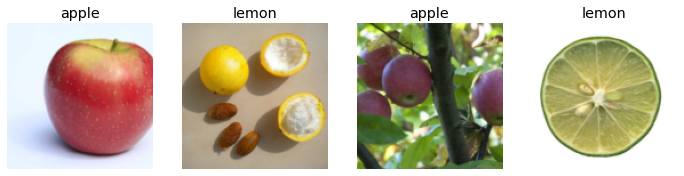

In [28]:
dls.valid.show_batch(max_n=4,nrows=1)

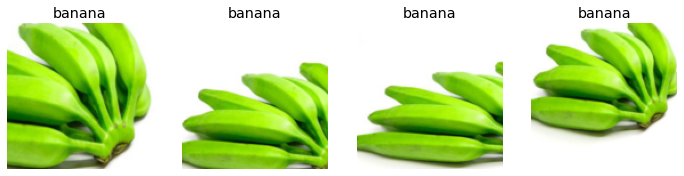

In [29]:
fruits = fruits.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = fruits.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

In [30]:

learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(7)

epoch,train_loss,valid_loss,error_rate,time
0,0.898469,0.715431,0.303448,00:53
1,0.806603,0.731232,0.282759,00:58
2,0.709196,0.836952,0.310345,00:55
3,0.596723,0.844202,0.317241,00:57
4,0.530915,0.825864,0.317241,00:52
5,0.473935,0.797719,0.317241,00:51
6,0.438831,0.788958,0.324138,01:02


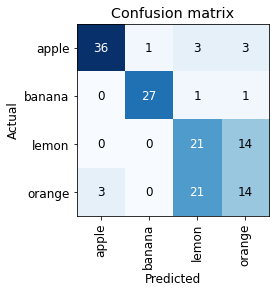

In [31]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [33]:
cleaner = ImageClassifierCleaner(learn)
cleaner
     

In [54]:
learn.export('fruit_classifier.pkl')